In [13]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
# Load a play dataset
tracking_file = "../data/tracking_week_1.csv"
lazy_df = pl.scan_csv(tracking_file, ignore_errors=True)

sample_play_frame = lazy_df.filter(
    (pl.col("gameId") == 2022091200) & 
    (pl.col("playId") == 64) & 
    (pl.col("frameId") == 30)
).collect()

sample_play_frame.head(5)

gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
i64,i64,i64,str,i64,str,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str
2022091200,64,35459,"""Kareem Jackson""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",22,"""DEN""","""right""",52.19,28.94,0.05,0.56,0.01,231.72,96.9,"""NA"""
2022091200,64,39987,"""Geno Smith""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",7,"""SEA""","""right""",34.97,23.87,0.67,0.38,0.07,86.94,67.88,"""NA"""
2022091200,64,41310,"""Gabe Jackson""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",66,"""SEA""","""right""",38.6,22.37,0.29,0.78,0.03,85.7,81.48,"""NA"""
2022091200,64,42393,"""Ronald Darby""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",23,"""DEN""","""right""",45.05,15.36,1.64,1.25,0.17,278.52,171.25,"""NA"""
2022091200,64,42403,"""Randy Gregory""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",5,"""DEN""","""right""",41.01,18.8,0.39,0.3,0.04,254.59,260.32,"""NA"""


In [3]:
sample_play_frame.shape

(23, 18)

In [6]:
MIN_X = 0
MIN_Y = 0
MAX_X = 120
MAX_Y = 160/3

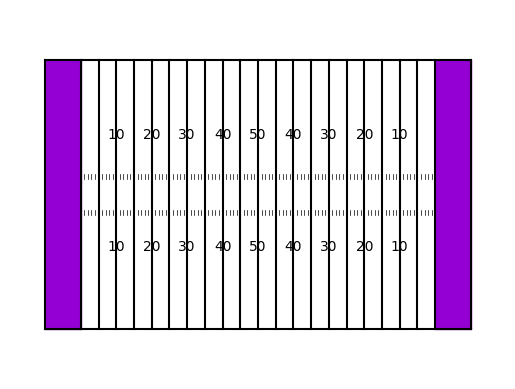

In [26]:
# Create a figure
fig = plt.figure()

# Create limits
plt.xlim(MIN_X - 10, MAX_X + 10)
plt.ylim(MIN_Y - 10, MAX_Y + 10) 

# Colour the endzones
endzone1 = patches.Rectangle((0,0), 10, 160/3, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')
endzone2 = patches.Rectangle((110,0), 10, 160/3, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')

plt.gca().add_patch(endzone1)
plt.gca().add_patch(endzone2)

# Draw field outline
plt.plot([0,120], [0,0], color="black")
plt.plot([0,120], [160/3,160/3], color="black")
plt.plot([0,0], [0,160/3], color="black")
plt.plot([120,120], [0,160/3], color="black")

# Draw yard lines
for x in range(10,115,5):
    plt.plot([x,x], [0,160/3], color="black")

# Draw hash marks
for x in range(10,110,1):
    plt.plot([x,x], [160/6 - 3.0833 - 1, 160/6 - 3.0833], color="black", linewidth=0.5)
    plt.plot([x,x], [160/6 + 3.0833 + 1, 160/6 + 3.0833], color="black", linewidth=0.5)
    
# Draw the yard numbers
for x in range(10,50,10):
    plt.text(x+10, 160/6 - 3.0833 - 8, str(x), fontsize=10, color="black", ha='center')
    plt.text(x+10, 160/6 + 3.0833 + 8, str(x), fontsize=10, color="black", ha='center')
    plt.text(110-x, 160/6 - 3.0833 - 8, str(x), fontsize=10, color="black", ha='center')
    plt.text(110-x, 160/6 + 3.0833 + 8, str(x), fontsize=10, color="black", ha='center')
plt.text(60, 160/6 - 3.0833 - 8, "50", fontsize=10, color="black", ha='center')
plt.text(60, 160/6 + 3.0833 + 8, "50", fontsize=10, color="black", ha='center')

# Hide axes
plt.axis('off')

fig.show()